# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

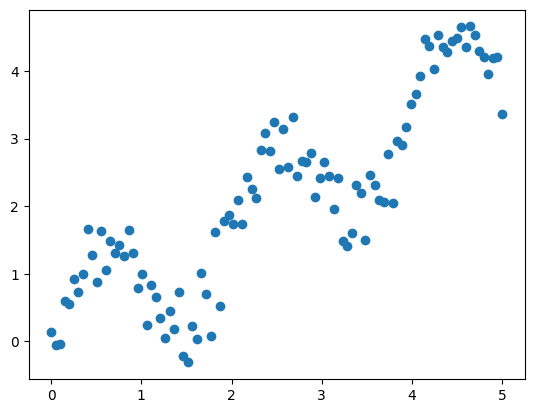

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5193974827425155


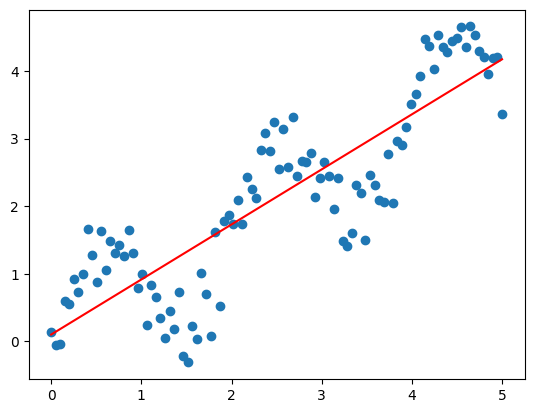

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

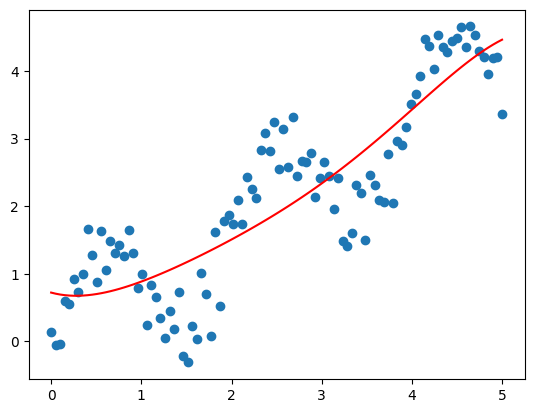

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.36347766  0.77986715 -0.31717247  0.06948362 -0.00566952]
interception:  0.7214580628043366


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.72145806, 0.70504945, 0.69238046, 0.68322192, 0.67735507,
       0.67457134, 0.67467209, 0.67746843, 0.68278096, 0.6904396 ,
       0.70028331, 0.71215987, 0.72592571, 0.74144562, 0.75859258,
       0.77724751, 0.79729903, 0.81864329, 0.84118368, 0.86483066,
       0.88950151, 0.91512011, 0.94161673, 0.96892778, 0.9969956 ,
       1.02576827, 1.0551993 , 1.08524752, 1.11587675, 1.14705566,
       1.17875748, 1.21095982, 1.24364445, 1.27679702, 1.31040691,
       1.34446697, 1.37897327, 1.41392495, 1.44932391, 1.48517465,
       1.52148402, 1.558261  , 1.59551649, 1.63326304, 1.67151471,
       1.71028676, 1.74959546, 1.7894579 , 1.82989171, 1.87091488,
       1.91254551, 1.95480158, 1.99770078, 2.04126021, 2.08549623,
       2.13042416, 2.17605813, 2.22241082, 2.26949322, 2.31731446,
       2.36588152, 2.41519906, 2.46526917, 2.51609116, 2.56766131,
       2.61997269, 2.6730149 , 2.72677384, 2.78123155, 2.8363659 ,
       2.89215042, 2.94855407, 3.00554101, 3.06307038, 3.12109

In [15]:
regr_poly.predict(X_poly)

array([0.72145806, 0.70504945, 0.69238046, 0.68322192, 0.67735507,
       0.67457134, 0.67467209, 0.67746843, 0.68278096, 0.6904396 ,
       0.70028331, 0.71215987, 0.72592571, 0.74144562, 0.75859258,
       0.77724751, 0.79729903, 0.81864329, 0.84118368, 0.86483066,
       0.88950151, 0.91512011, 0.94161673, 0.96892778, 0.9969956 ,
       1.02576827, 1.0551993 , 1.08524752, 1.11587675, 1.14705566,
       1.17875748, 1.21095982, 1.24364445, 1.27679702, 1.31040691,
       1.34446697, 1.37897327, 1.41392495, 1.44932391, 1.48517465,
       1.52148402, 1.558261  , 1.59551649, 1.63326304, 1.67151471,
       1.71028676, 1.74959546, 1.7894579 , 1.82989171, 1.87091488,
       1.91254551, 1.95480158, 1.99770078, 2.04126021, 2.08549623,
       2.13042416, 2.17605813, 2.22241082, 2.26949322, 2.31731446,
       2.36588152, 2.41519906, 2.46526917, 2.51609116, 2.56766131,
       2.61997269, 2.6730149 , 2.72677384, 2.78123155, 2.8363659 ,
       2.89215042, 2.94855407, 3.00554101, 3.06307038, 3.12109

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

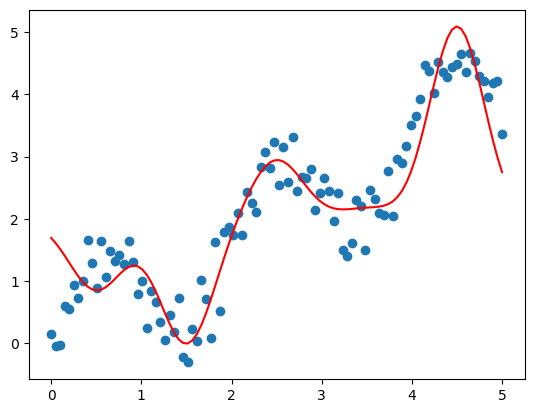

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.11567972 -1.98075818  0.98177774  0.19301306  3.12298081]
interception:  1.970264838688706


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

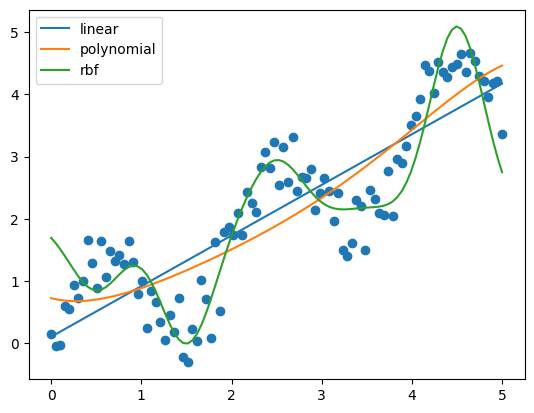

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5193974827425155


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4708507994236101


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.27542964408250986
